In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


MNIST = pd.read_csv('Numbers.txt', delim_whitespace=True) #read the data from  Numbers.txt as a csv file

print(MNIST.head()) #print the first 5 rows of the data
print(MNIST.shape[1]) #print the number of columns in the data

y = MNIST.iloc[:, 0].values
X = MNIST.iloc[:, 1:].values

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_values = [1, 3, 5, 10 ,20]

cv_scores = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores =  cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores[k] = scores.mean()

for k, score in cv_scores.items():
    print(f'k={k}, Cross-Validation Score: {score}')


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k=3: {accuracy}')


   V1   V2   V3   V4     V5     V6     V7     V8     V9    V10  ...   V248  \
1   0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.972  0.178  1.000  0.689  ...  0.522   
2   9 -1.0 -1.0 -1.0 -1.000 -1.000 -0.815  0.268  0.640  0.869  ... -0.090   
3   8 -1.0 -1.0 -1.0 -1.000 -0.987 -0.806 -0.169  0.350  0.986  ...  0.873   
4  -9 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -0.851  0.668 -0.858  ...  0.832   
5   8 -1.0 -1.0 -1.0 -0.928  0.162 -0.014 -0.210  0.999  1.000  ... -1.000   

    V249   V250   V251   V252   V253  V254  V255  V256  V257  
1  0.940  1.000  0.400 -0.337 -0.954  -1.0  -1.0  -1.0  -1.0  
2  0.990 -0.381 -1.000 -1.000 -1.000  -1.0  -1.0  -1.0  -1.0  
3  1.000  1.000  0.832  0.196 -0.714  -1.0  -1.0  -1.0  -1.0  
4 -0.017 -0.847 -1.000 -1.000 -1.000  -1.0  -1.0  -1.0  -1.0  
5 -0.683  0.711  1.000  0.320 -0.928  -1.0  -1.0  -1.0  -1.0  

[5 rows x 257 columns]
257
(2000, 256) (2000,)
k=1, Cross-Validation Score: 0.928125
k=3, Cross-Validation Score: 0.9268749999999999
k=5, Cross-Validati

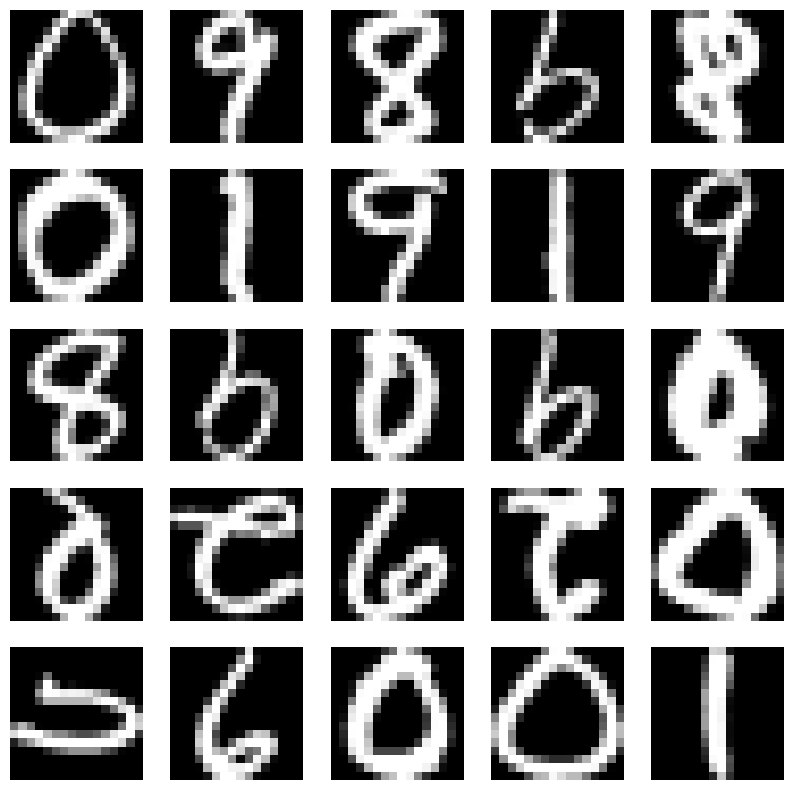

In [59]:
import matplotlib.pyplot as plt

labels = MNIST.iloc[:, 0].values
pixels = MNIST.iloc[:, 1:].values

assert pixels.shape[1] == 256, "Each image should have 256 pixels (16x16)."

def plot_image (images, labels, num_images):
    plt.figure(figsize = (10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        image = images[i].reshape(16, 16)
        plt.imshow(image, cmap='gray')
        plt.xlabel(labels[i])
        plt.axis('off')
    plt.show()

plot_image(pixels, labels, 25)  